# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?


It will have 4 degrees of freedom, one for each parameter it will fit to.

- - -

**b)** Why is it bad for a model to have too many degrees of freedom?



A model with two many degrees of freedom will be fitting to noise (see correlations where there are none) and therefore struggle to converge to an optimal solution. Too many degrees might also make the model memorize the data instead of predicting using the underlying structure. 

It will make the model more complex and therefore loose some explainability. 

 - - -

**c)** Why is it bad for a model to have too few degrees of freedom?



If it has two few degrees of freedom it will not predict based on all the available information. The model will be to simple to learn the patterns, it will be like trying to fit a straight line to a curve.

 - - -

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?



$$
df(\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda}
$$
Here $\lambda$ restricts how the different parameters are fit to the model.
A higher $\lambda$ creates less emphasis on the smaller $d_j$'s. 


- - -

**e)** Why might we want to use Ridge regression instead of OLS?



To decrease the effective degrees of freedom of the model, getting the opposite benefits from what was written in exercise $1b$. 

- - -

**f)** Why might we want to use OLS instead of Ridge regression?



The difference to Ridge regression, is that OLS has an analytical solution to the problem that is easily calculated and will therefore fit the training data perfectly. 
So if one is confident that the features selected is right, then OLS is optimal. If not it might overfit the training data or memorize unimportant information in making its predictions.
- - -

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

- - -
We are going to minimize the following cost function based on $\beta$:
$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

This is the same as the MSE function except added an extra term $\lambda \vert\vert \beta \vert\vert^2$.
So in doing the derivative we can borrow from exercise 2 in week 35 and only focus on the second term.

Now lets take the derivative of this expression with regards to $\beta$:

$$
\frac{\partial (\left(\boldsymbol{y}-\boldsymbol{X}\beta\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\beta\right) + \lambda \beta^T \beta )}{\partial\beta} = -2 (\boldsymbol{y} - \boldsymbol{X} \beta)^T \boldsymbol{X}+ 2 \lambda \beta^T
$$

Setting the gradient equal $0$:

$$
\begin{aligned}
0 &= 2 (\boldsymbol{y} - \boldsymbol{X} \beta)^T \boldsymbol{X}+ 2 \lambda \beta^T \\
0 &= - \boldsymbol{y}^T X + \beta^T \boldsymbol{X}^T \boldsymbol{X} + \lambda \beta^T \\
\boldsymbol{y}^T X &= \beta^T \boldsymbol{X}^T \boldsymbol{X} + \lambda \beta^T \\
\boldsymbol{y}^T X * (\boldsymbol{X}^T \boldsymbol{X} +\lambda \boldsymbol{1})^{-1} &= \beta^T \\
(\boldsymbol{X}^T \boldsymbol{X} +\lambda \boldsymbol{1})^{-1} \boldsymbol{X}^T \boldsymbol{y}&= \beta
\end{aligned}
$$



*NB!*

I am highly uncertain about the truth of this equation $\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T$, is the answer not $\boldsymbol{a}?$ This runs through last weeks exercises, but as it is just a little problem i choose to do the same method here as well. The derivations would still be the same i believe, just simpler.


## Exercise 3 - Scaling data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [3]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X
    # could this be a loop?

In [4]:
def old_polynomial_features(x, p, intercept=False):
    n = len(x)
    X = np.zeros((n, p))
    X[:, 0] = x[:]
    X[:, 1] = x**2
    X[:, 2] = x**3
    return X

**b)** Split your data into training and test data(80/20 split)

In [5]:
X = polynomial_features(x, 3, intercept=False)

print(x[5])
print(X[5])

-2.696969696969697
[ -2.6969697    7.27364555 -19.61680163]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [8]:
def Ridge_parameters(X, y, training_parameter=1.0):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + training_parameter * np.identity(len(X.T))) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

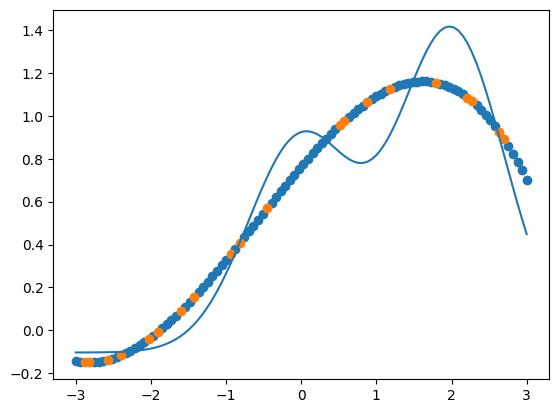

In [9]:
plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

#### Solution to A:

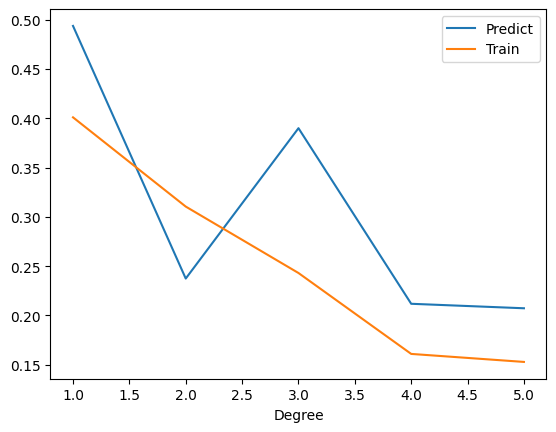

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plot_predict = []
plot_train = []
degrees = np.arange(1, 6)
training_parameter = 0.001

for degree in degrees:
    X = polynomial_features(x, degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    beta = Ridge_parameters(X_train, y_train,training_parameter=training_parameter)
    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    mse_predict = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    plot_predict.append(mse_predict)
    plot_train.append(mse_train)

plt.plot(degrees, plot_predict, label="Predict")
plt.plot(degrees, plot_train, label="Train")
plt.xlabel("Degree")
plt.legend()
plt.show()

#### Solution to B:

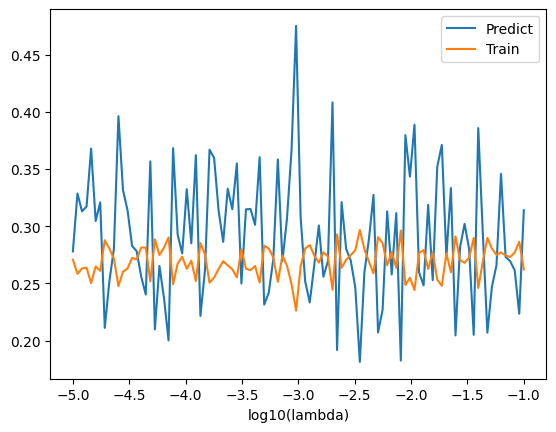

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plot_predict = []
plot_train = []
degrees = [3]
nlambdas = 100
training_parameters = np.logspace(-5, -1, nlambdas)

for degree in degrees:
    for training_parameter in training_parameters:
        X = polynomial_features(x, degree)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        beta = Ridge_parameters(X_train, y_train,training_parameter=training_parameter)
        y_pred = X_test @ beta
        y_train_pred = X_train @ beta
        mse_predict = mean_squared_error(y_test, y_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        plot_predict.append(mse_predict)
        plot_train.append(mse_train)

plt.plot(np.log10(training_parameters), plot_predict, label="Predict")
plt.plot(np.log10(training_parameters), plot_train, label="Train")
plt.xlabel("log10(lambda)")
plt.legend()
plt.show()

#### Solution to C

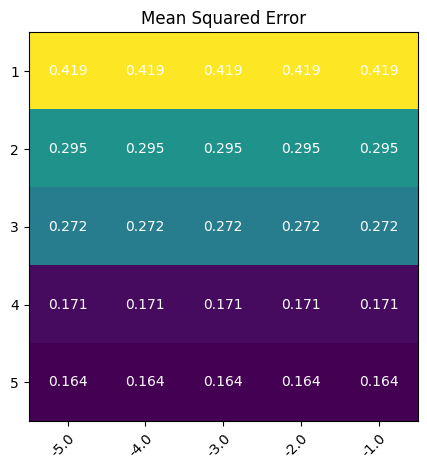

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



degrees = np.arange(1, 6)
nlambdas = 5
training_parameters = np.logspace(-5, -1, nlambdas)

plot_predict = np.zeros((len(degrees),nlambdas))

for i in range(len(degrees)):
    degree = degrees[i]
    for j in range(len(training_parameters)):
        training_parameter = training_parameters[j]
        X = polynomial_features(x, degree)
        beta = Ridge_parameters(X, y,training_parameter=training_parameter)
        y_pred = X @ beta
        mse_predict = mean_squared_error(y, y_pred)
        plot_predict[i,j] = mse_predict

fig, ax = plt.subplots()
im = ax.imshow(plot_predict)

ax.set_xticks(range(len(training_parameters)), labels=np.log10(training_parameters),
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(degrees)), labels=degrees)

# Loop over data dimensions and create text annotations.
for i in range(len(degrees)):
    for j in range(len(training_parameters)):
        text = ax.text(j, i, f"{plot_predict[i, j]:.3f}",
                       ha="center", va="center", color="w")

ax.set_title("Mean Squared Error")
fig.tight_layout()
plt.show()